In [43]:
import pandas as pd
import numpy as np
dados = pd.read_csv('Consumo_cerveja.csv', sep=';', encoding='UTF-8')
dados.head(5)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [44]:
dados.shape[0]

365

In [45]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


#### Matriz de correlaçao

In [46]:
dados.corr(numeric_only=True).round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


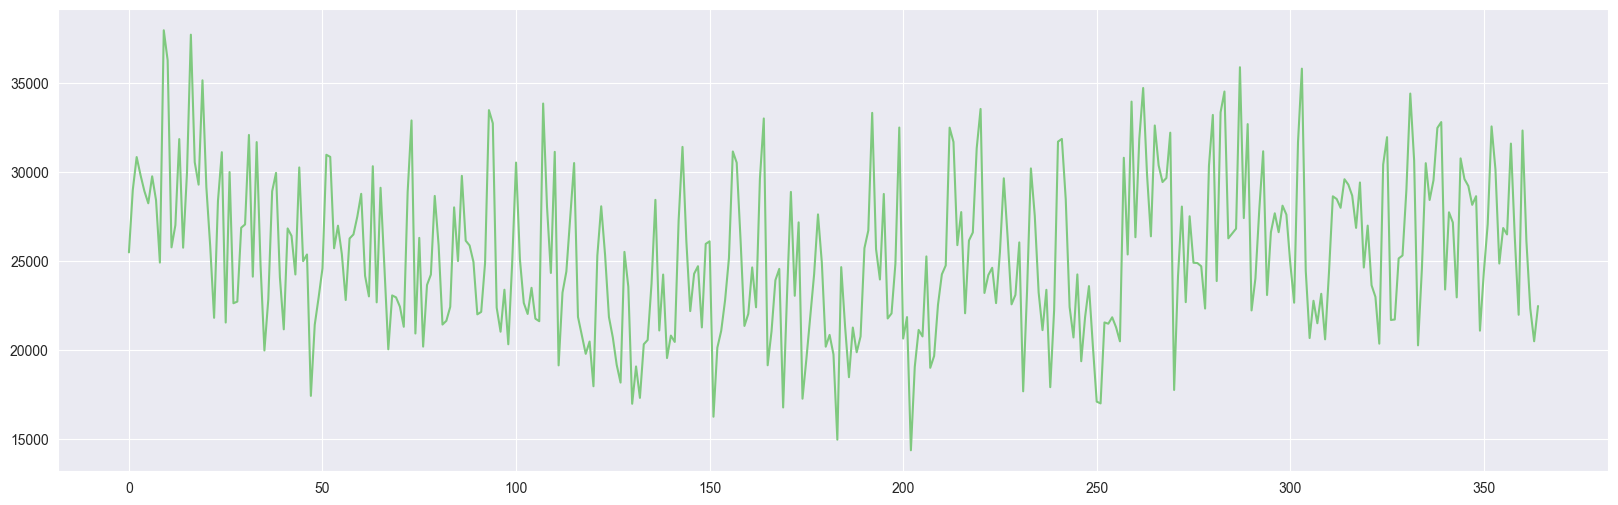

In [47]:
ax = dados['consumo'].plot(figsize = (20,6))

#### Boxplot

In [48]:
import seaborn as sns

Text(0.5, 0, 'Litros')

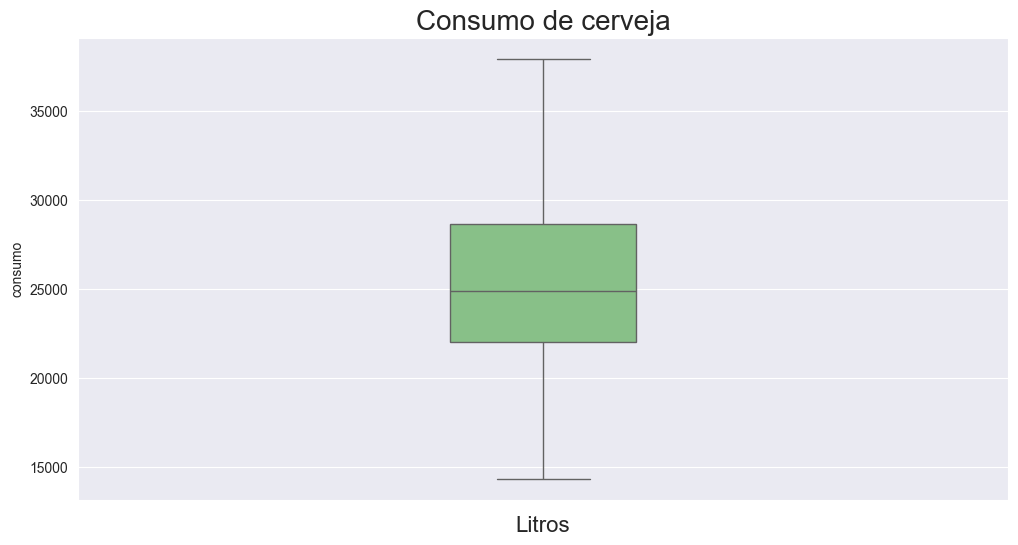

In [49]:
ax = sns.boxplot(data=dados['consumo'], orient ='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_xlabel('Litros',fontsize=16)

<Axes: title={'center': 'Consumo de cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

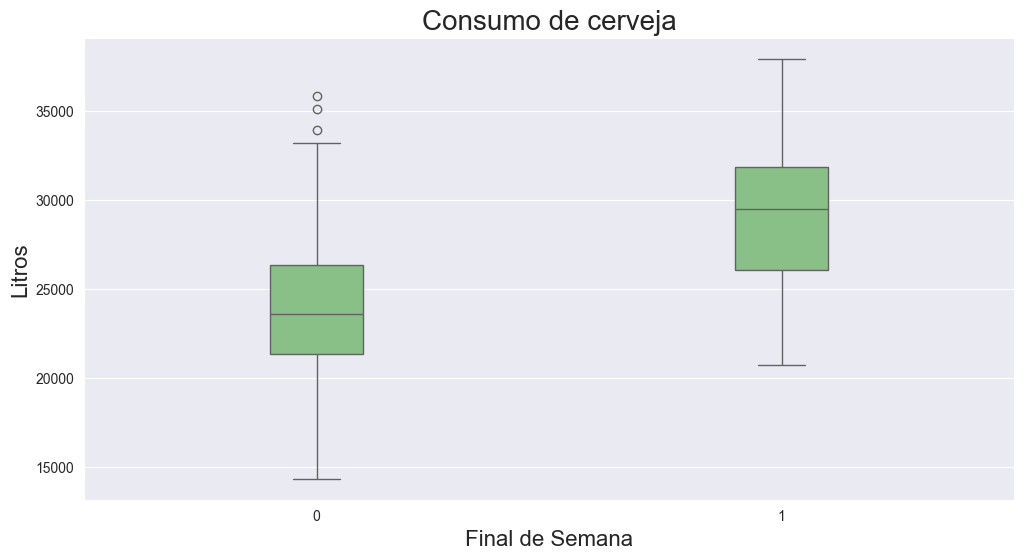

In [50]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient ='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros',fontsize=16)
ax.set_xlabel('Final de Semana',fontsize=16)
ax

In [51]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

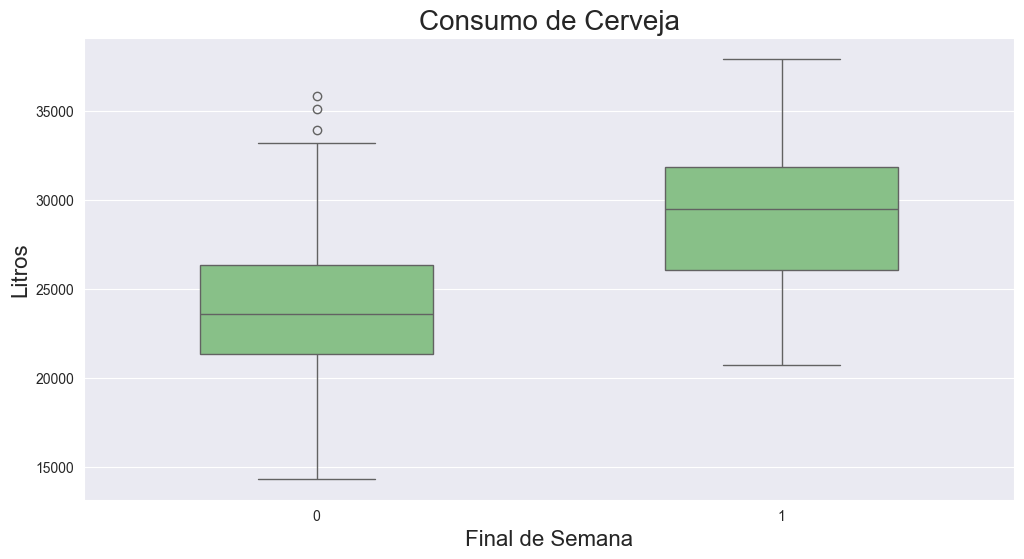

In [52]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

#### Distribuição de frequências da variável *dependente* (y)

Text(0, 0.5, 'Litros')

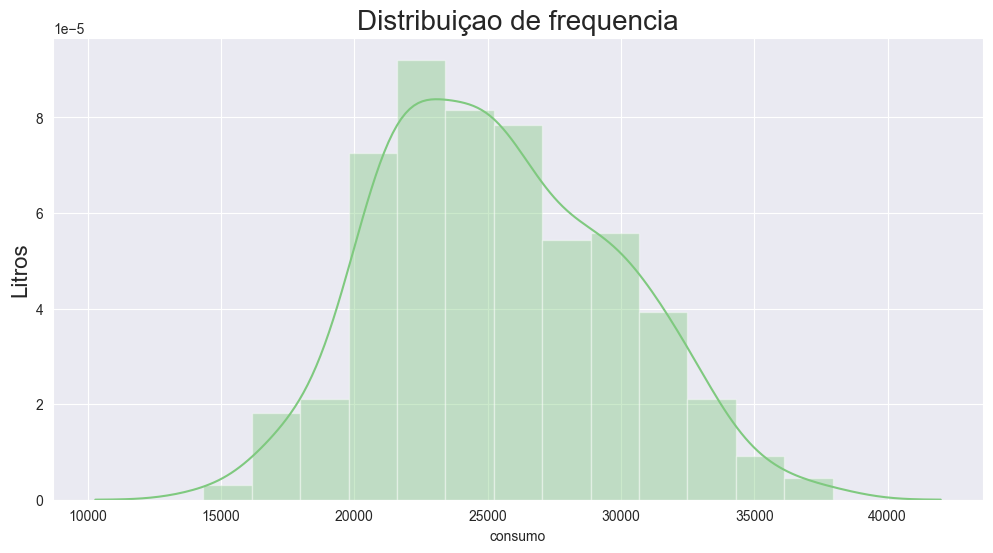

In [53]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuiçao de frequencia', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)

#### Gráficos de dispersão

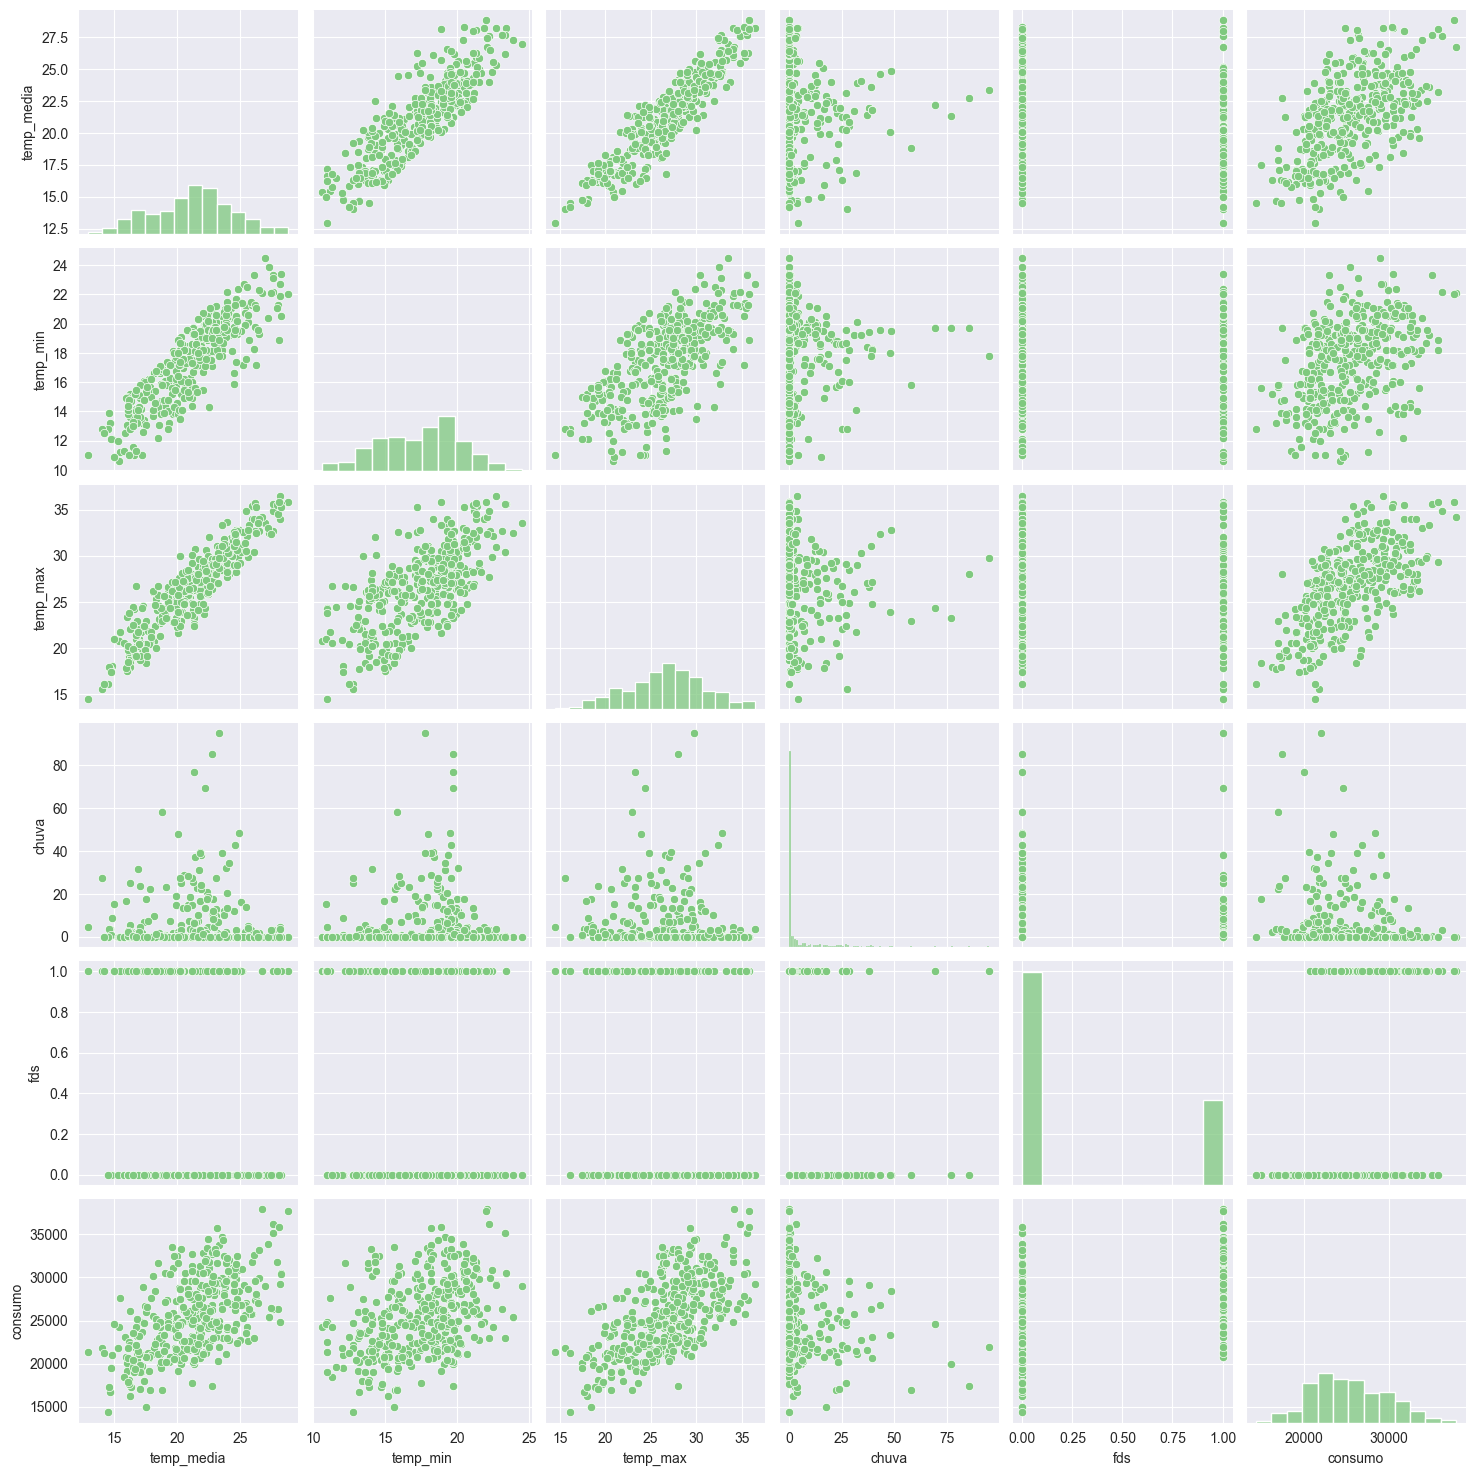

In [54]:
ax = sns.pairplot(dados)
ax

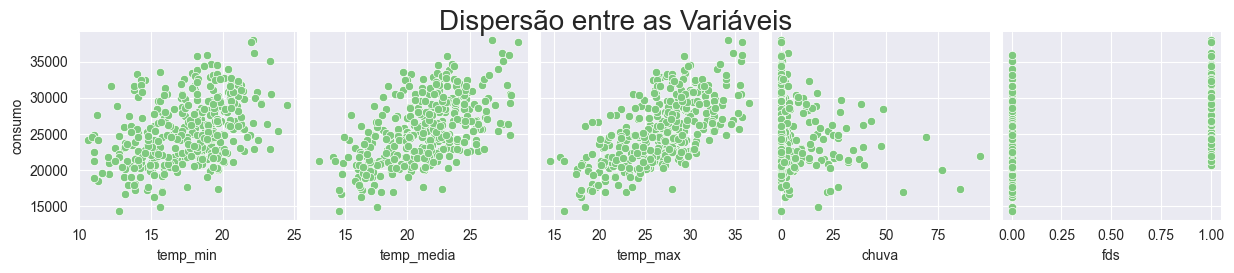

In [55]:
import warnings
warnings.filterwarnings('ignore')

ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

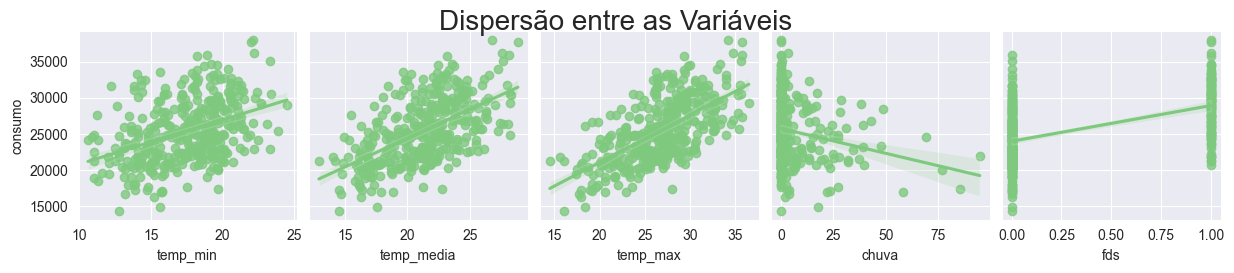

In [56]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

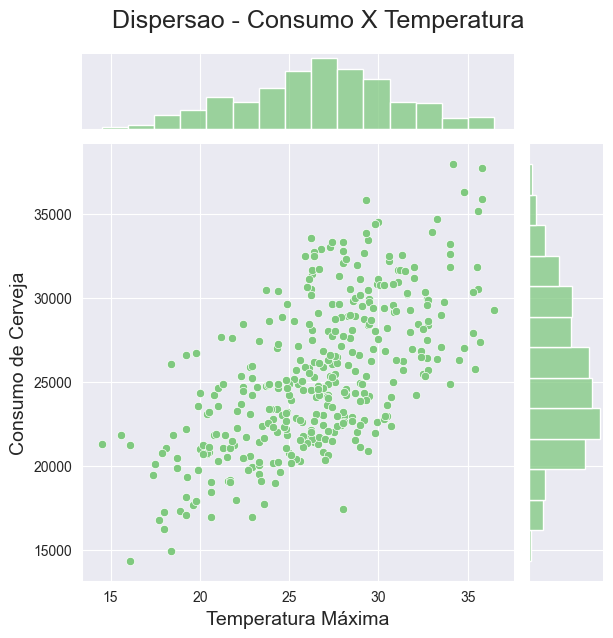

In [57]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

#### Plotando um jointplot com a reta de regressão estimada

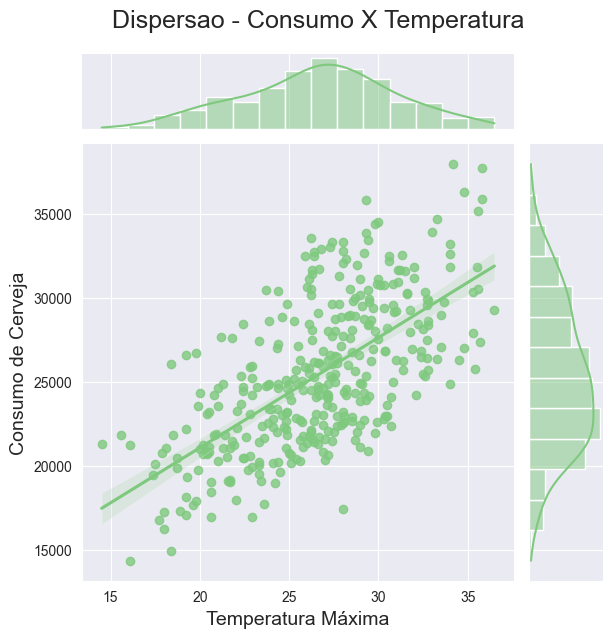

In [58]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind= 'reg')
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

#### Variável Dependente X Variáveis Explicativas

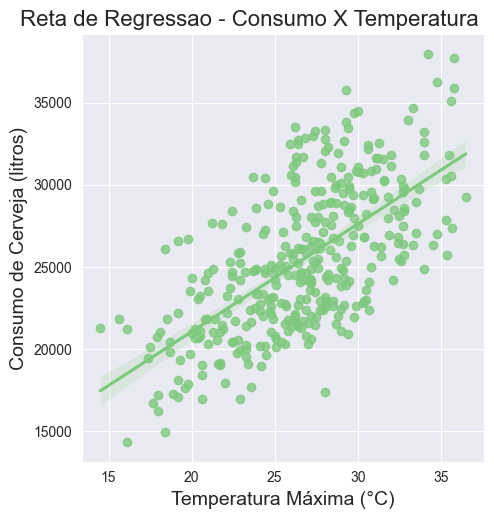

In [59]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

#### Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

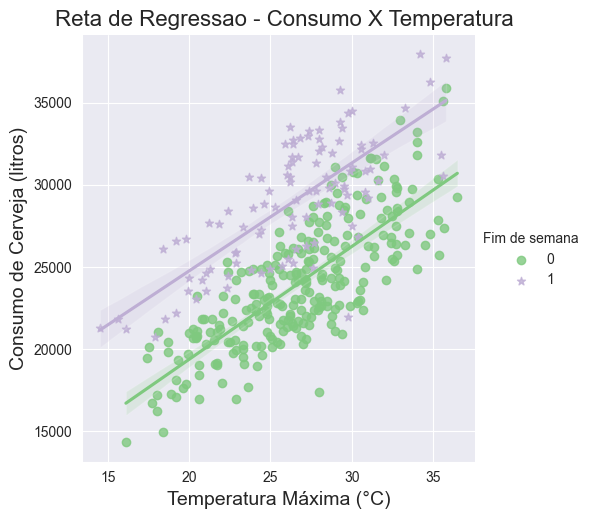

In [60]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados, hue="fds", markers=["o","*"], legend=False)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de semana")
ax

#### Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

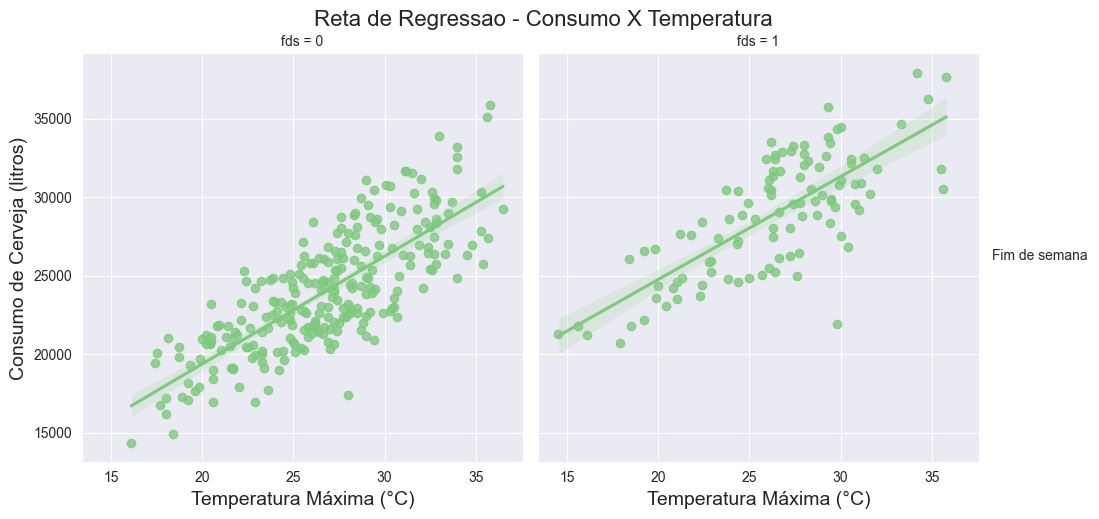

In [61]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados, col="fds")
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de semana")
ax

## Estimando um Modelo de Regressão Linear para o Consumo

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
y = dados['consumo']

In [64]:
X=dados[['temp_max', 'chuva','fds']]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [66]:
X_train.shape[0], X_test.shape[0]

(255, 110)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [68]:
modelo = LinearRegression()

In [69]:
modelo.fit(X_train, y_train)

LinearRegression()

In [70]:
modelo.score(X_train, y_train).round(2)

0.73

In [71]:
y_previsto = modelo.predict(X_test)

In [72]:
metrics.r2_score(y_test, y_previsto).round(2)

0.69

### Obtendo Previsões Pontuais
<hr style='border: 2px solid red;'>

In [73]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [74]:
modelo.predict(entrada)

array([26094.90177526])

In [75]:
temp_max = 35
chuva = 0
fds = 1
entrada = [[temp_max, chuva, fds]]
consumo = modelo.predict(entrada).round(2)
consumo

array([35318.85])

#### Interpretação dos Coeficientes Estimados

In [76]:
modelo.intercept_

5951.9763393124485

In [77]:
type(modelo.intercept_)

numpy.float64

In [78]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [79]:
type(modelo.coef_)

numpy.ndarray

Confirmando a ordem das variáveis explicativas no DataFrame

In [80]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [81]:
index=['Intercepto','Temperatura Maxima','Chuva (mm)','Final de semana']

In [82]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parametros'])

,Parametros
Intercepto,5951.976339
Temperatura Maxima,684.736759
Chuva (mm),-60.782435
Final de semana,5401.083339


#### Gerando as previsões do modelo para os dados de TREINO

In [83]:
y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

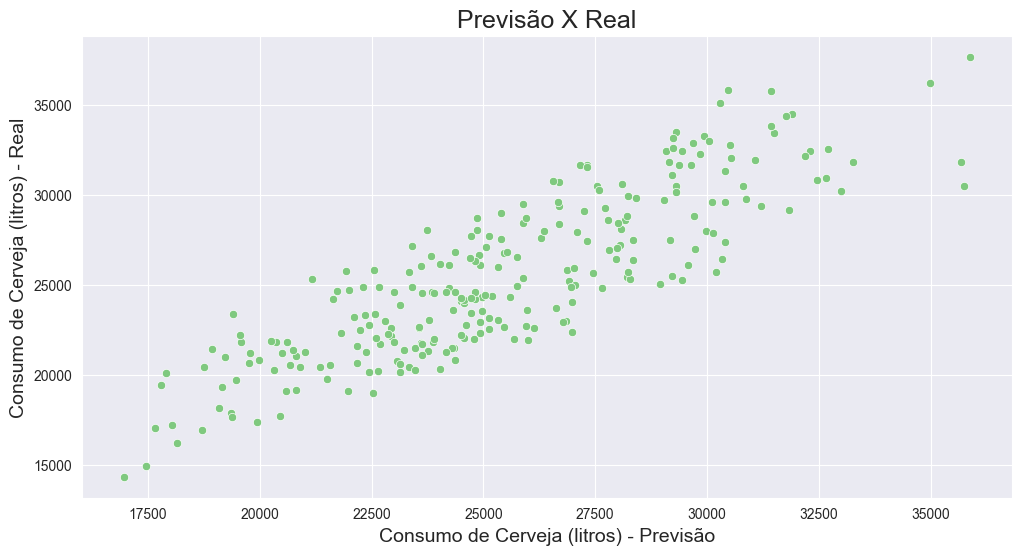

In [84]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

In [85]:
residuo = y_train - y_previsto_train

#### Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

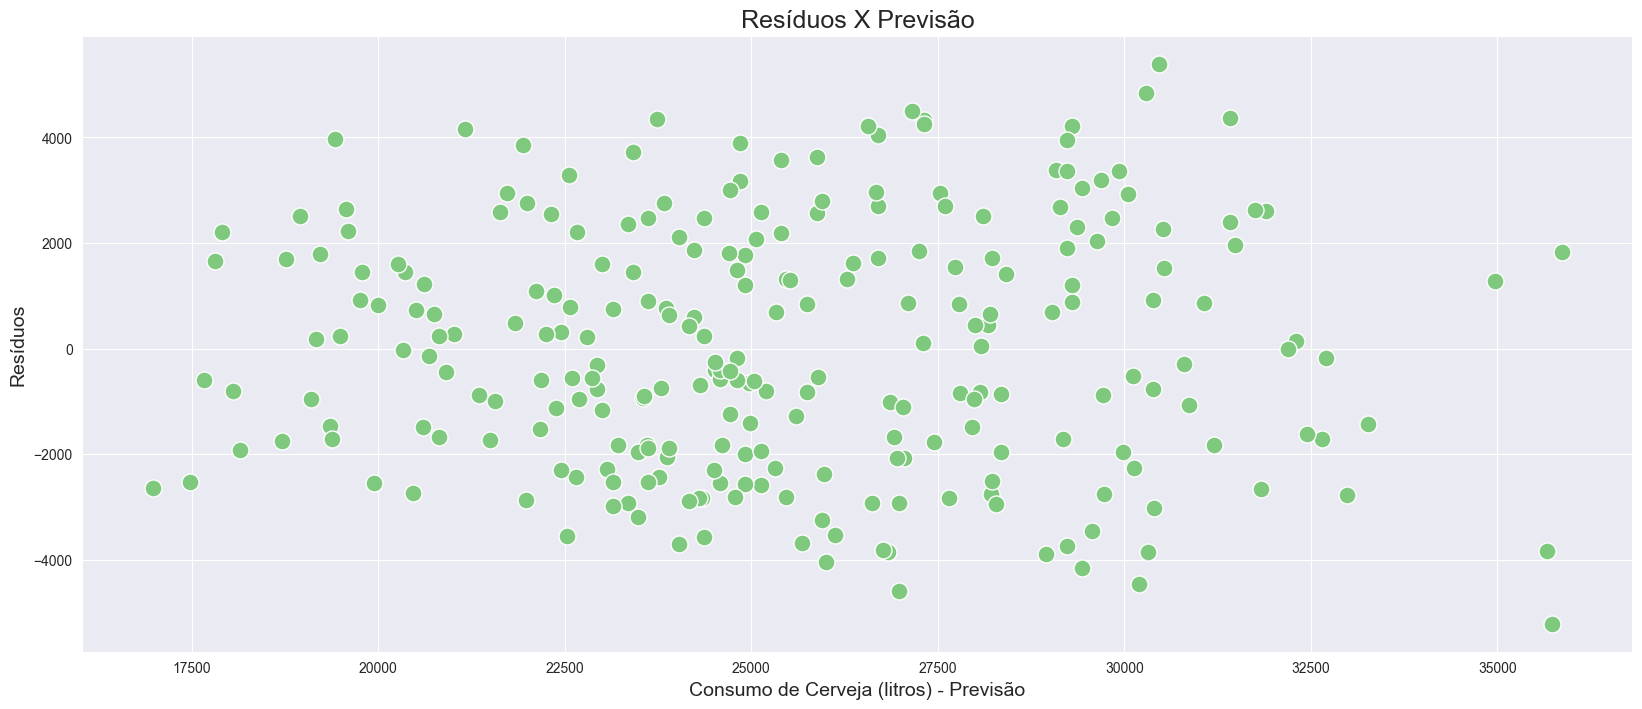

In [86]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

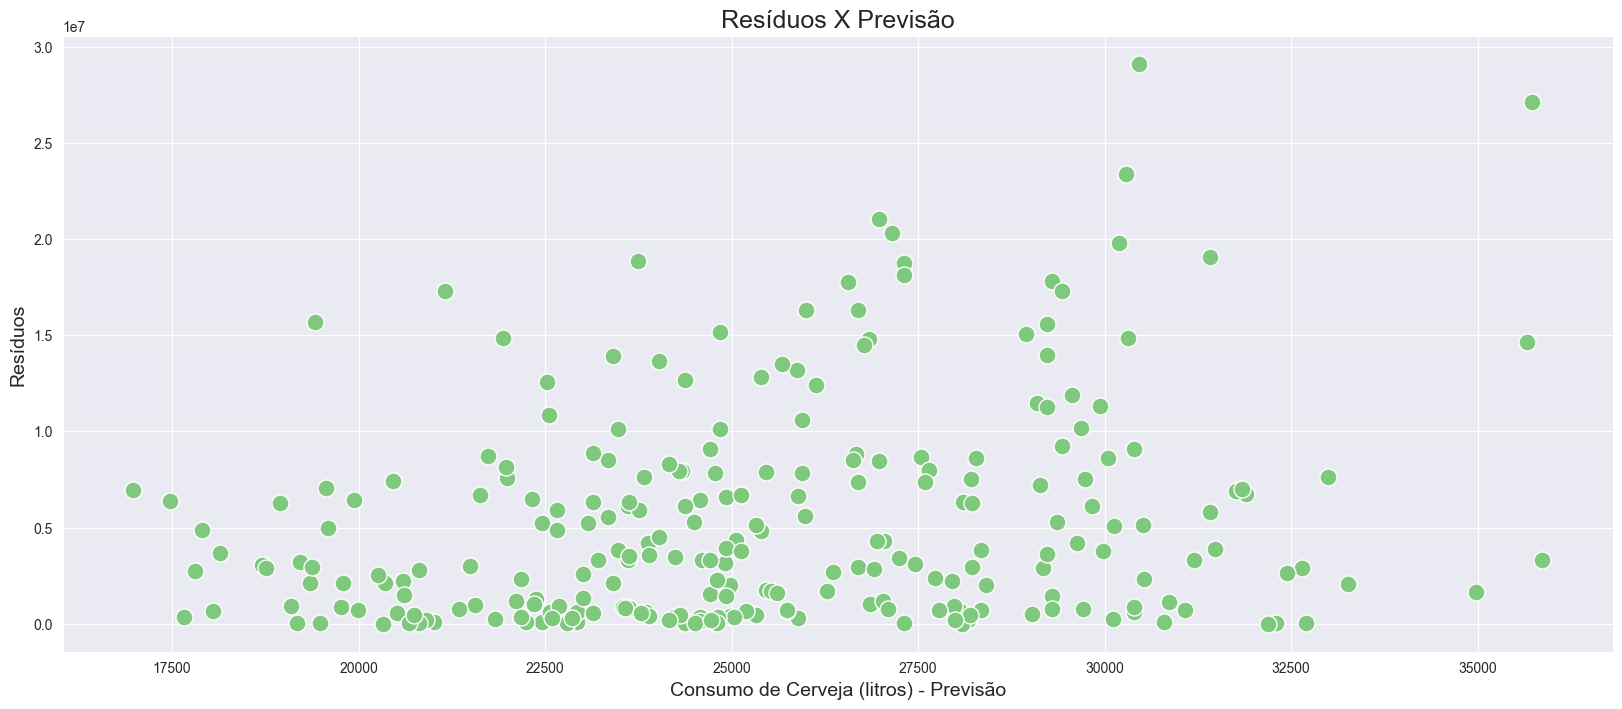

In [87]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

Plotando a distribuição de frequências dos resíduos

<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Density'>

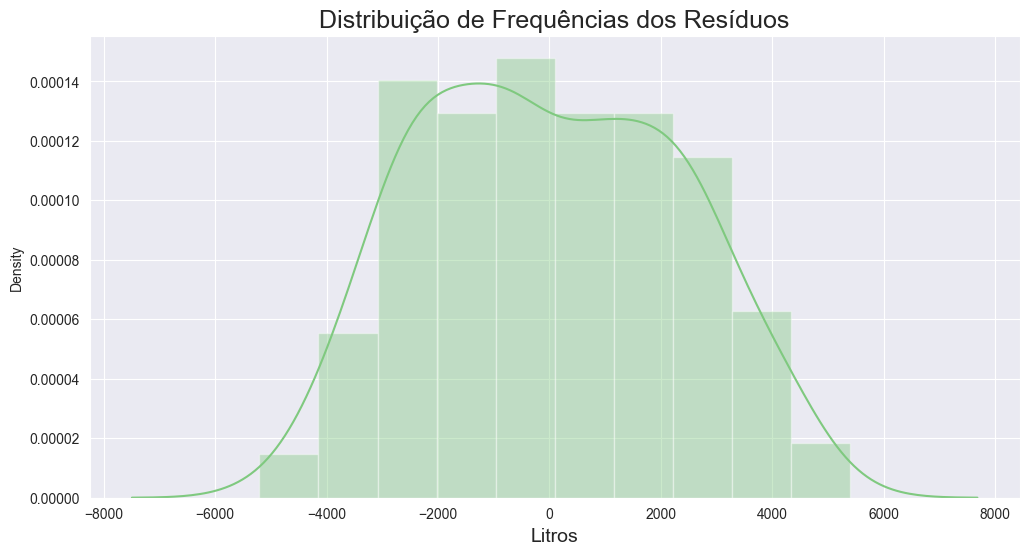

In [88]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

### Comparando Modelos


Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [89]:
X2 = dados[['temp_media', 'chuva', 'fds']]

In [90]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [91]:
modelo2 = LinearRegression()

In [92]:
modelo2.fit(X2_train, y_train)

LinearRegression()

In [93]:
modelo.score(X_train, y_train).round(2)

0.73

In [94]:
modelo2.score(X2_train, y_train).round(2)

0.66

In [95]:
y_previsto_2 = modelo2.predict(X2_test)

In [96]:
metrics.r2_score(y_test, y_previsto).round(2)

0.69

In [97]:
metrics.r2_score(y2_test, y_previsto_2).round(2)

0.66

#### Obtendo métricas para o modelo com Temperatura Média

In [98]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [99]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69
